<a href="https://colab.research.google.com/github/emms204/DataDrive2030-Early-Learning-Predictors-/blob/main/DataDrive2030_Early_Learning_Predictors_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/DataDrive2030 Early Learning Predictors Challenge')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.2 MB/s eta 0:00:00


In [5]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 11.8 MB/s eta 0:00:00


In [6]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import shap

In [234]:
Train = pd.read_csv('Train_DD.csv')
Test = pd.read_csv('Test_DD.csv')
Sub = pd.read_csv('SampleSubmission.csv')
VarD = pd.read_csv('VariableDescription.csv')

In [235]:
Train.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1st year in the programme,98.099998,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.599998
4,ID_IZTY6TC4D,2021.0,2021-10-13,57.000000,2021-10-13,0.0,NaN,2nd year in programme,114.000000,Almost always,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.599998


In [236]:
Test.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_4,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7
0,ID_0I0999N6S,2021.0,2021-09-20,57.000000,NaN,NaN,Yes,2nd year in programme,108.0,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_GQ6ONJ4FP,2021.0,2021-10-21,54.000000,2021-01-10,9.0,Yes,1st year in the programme,105.0,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_YZ76CVRW3,2021.0,2021-05-17,57.000000,NaN,NaN,Yes,NaN,101.5,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_BNINCRXH8,2022.0,2022-09-09,59.334702,NaN,NaN,NaN,3rd year in programme,NaN,Almost always,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,ID_1U7GDTLRI,2021.0,2021-10-12,54.000000,2021-01-15,8.0,Yes,1st year in the programme,103.5,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
pd.set_option('display.max_colwidth', 100)
VarD

,Variable Name,Variable Label,Answer Label
0,child_id,Unique child ID,Open ended
1,data_year,Year data was collected,Open ended
2,child_date,ELOM date,Open ended
3,child_age,Child age in months,Open ended
4,child_enrolment_date,Date enrolled in ELP,Open ended
...,...,...,...
676,child_attends,Does child attend an ECD programme?,NaN
677,child_attendance,How many days per week does the child attend the ECD programme,NaN
678,child_languages,Child home language(s),NaN
679,pri_fees_amount_pv,Facility monthly fee (present value),NaN


In [238]:
vard = VarD.set_index('Variable Name').T

In [239]:
def plot_missing_cols(df, threshold=0.8, plot=True):
  missing_per = df.isnull().sum()/len(df)
  missing_per_thresh = missing_per[missing_per>threshold]
  if plot:
    plt.figure(figsize=(20,10))
    plt.barh(missing_per_thresh.index, missing_per_thresh.values * 100)
    plt.xlabel('Percentage of missing values')
    plt.title(f'Missing percentage above {threshold*100}% theshold')
    plt.show()
  return missing_per_thresh.index


##Feature Visualization

In [92]:
def scatterplot(x,y):
  fig, ax = plt.subplots()
  ax.scatter(x,y)
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  ax.set_title(f'{x.name} vs {y.name}')
  plt.show()

In [93]:
def boxplot(df):
  fig, ax = plt.subplots()
  ax.boxplot(df)
  ax.set_xticklabels(list(df.columns))
  ax.set_ylabel('Value')
  ax.set_title(f'Boxplot of {" vs ".join(list(df.columns))}')
  plt.show()

In [94]:
def heatmap(df, length=10, width=5, cmap='rocket'):
  heatmap_df = df.corr()
  fig, ax = plt.subplots(figsize=(length, width))
  sns.heatmap(data=heatmap_df, annot=True, cmap=cmap, ax=ax)
  ax.set_title(f'Heatmap of {" and ".join(list(df.columns))}')
  plt.show()

In [95]:
def violinplot(x, y,hue,scale=None,length=10, width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.violinplot(x=x,y=y,hue=hue,scale=scale,ax=ax)
  ax.set_title(f'ViolinPlot of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.legend(title=hue.name)
  plt.show()

In [96]:
def barchart(x,y,length=10,width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.barplot(x=x,y=y,ax=ax)
  ax.set_title(f'Bar Chart of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.show()

In [97]:
def stack_barchart(x,y,hue,length=10,width=5):
  fig, ax = plt.subplots(figsize=(length,width))
  sns.barplot(x=x,y=y,hue=hue,ax=ax)
  ax.set_title(f'Bar Chart of {x.name} and {y.name}')
  ax.set_xlabel(x.name)
  ax.set_ylabel(y.name)
  plt.legend(title=hue.name)
  plt.show()

In [102]:
Train['Train'] = 'Train'
Test['Train'] = 'Test'
Data = pd.concat([Train, Test])
data = Data.drop(['child_id'],axis=1)

In [240]:
def targetmap(age, target):
  if (age >= 49) and (age < 60):
    if (target >= 0) and (target < 36.02):
      return "At Risk"
    elif (target >= 36.02) and (target < 46.32):
      return "Falling Behind"
    elif (target >= 46.32) and (target < 101):
      return "Achieving the Standard"
  
  elif (age >= 60) and (age < 70):
    if (target >= 0) and (target < 43.24):
      return "At Risk"
    elif (target >= 43.24) and (target < 54.38):
      return "Falling Behind"
    elif (target >= 54.38) and (target < 101):
      return "Achieving the Standard"

In [241]:
Train['target_cat'] = Train[['child_age','target']].apply(lambda row:targetmap(row[0],row[1]),axis=1)

In [242]:
#Checking out the Children Columns
Train.filter(like='child').head(3)

,child_id,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,...,child_attendance,child_languages,child_age_group,pri_children_4_6_years,obs_toilets_children,count_children_present,count_children_attendance,count_children_precovid,count_toilets_children,language_child
0,ID_SYSJ2FM0D,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,Sometimes,...,NaN,NaN,50-59 months,NaN,NaN,NaN,NaN,NaN,NaN,Sesotho
1,ID_J5BTFOZR3,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,Almost never,...,NaN,NaN,60-69 months,NaN,NaN,NaN,NaN,NaN,NaN,isiZulu
2,ID_R00SN7AUD,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,Often,...,NaN,NaN,60-69 months,NaN,NaN,NaN,NaN,NaN,8.0,Afrikaans


In [243]:
vard[Train.filter(like='child').columns[:10]]

Variable Name,child_id,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated
Variable Label,Unique child ID,ELOM date,Child age in months,Date enrolled in ELP,Months enrolled at ELP,Does the childs primary caretaker receive the Child Support Grant?,For how many years has this child been in the programme?,Child height in cm,Did the child pay attention to the instructions and demonstrations throughout...,Did the child stay concentrated and on task during the activities and was not...
Answer Label,Open ended,Open ended,Open ended,Open ended,Open ended,NaN,NaN,Open ended,NaN,NaN


###child grant

In [135]:
Train['child_grant'].isnull().sum()/len(Train)

0.36493884682585903

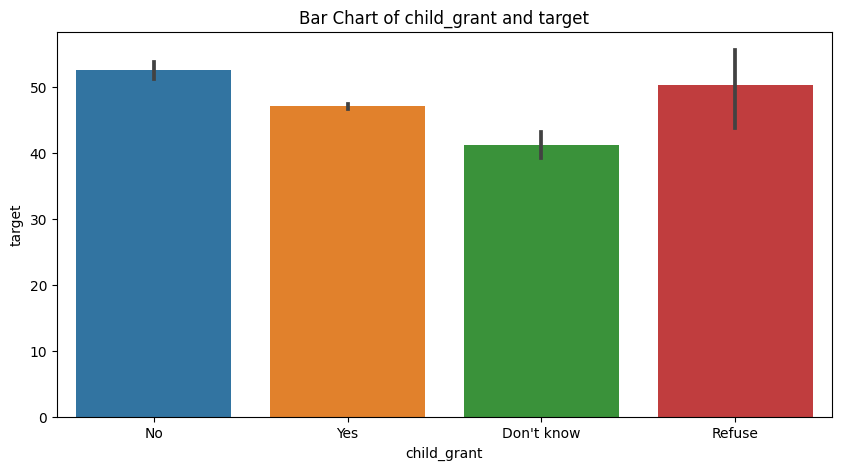

In [136]:
barchart(Train['child_grant'],Train['target'])

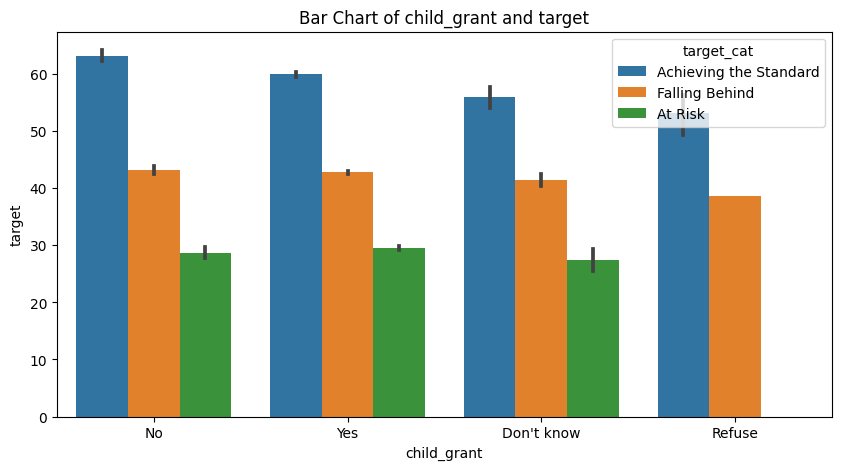

In [137]:
stack_barchart(Train['child_grant'],Train['target'],hue=Train['target_cat'])

In [138]:
#Children whose primary caretaker refused the Child Support Grant have no child At Risk
#Children whose primary caretaker refused the Child Support Grant have more children achieving the standard

In [139]:
Train['child_grant'].value_counts()

Yes           4515
No             764
Don't know     168
Refuse           5
Name: child_grant, dtype: int64

In [140]:
Train[Train['child_grant']=='Yes']['target_cat'].value_counts()/len(Train[Train['child_grant']=='Yes'])

Achieving the Standard    0.455814
Falling Behind            0.275083
At Risk                   0.269103
Name: target_cat, dtype: float64

In [141]:
Train[Train['child_grant']=='No']['target_cat'].value_counts()/len(Train[Train['child_grant']=='No'])

Achieving the Standard    0.615183
At Risk                   0.206806
Falling Behind            0.178010
Name: target_cat, dtype: float64

In [142]:
Train[Train['child_grant']=="Don't know"]['target_cat'].value_counts()/len(Train[Train['child_grant']=="Don't know"])

Falling Behind            0.345238
At Risk                   0.339286
Achieving the Standard    0.315476
Name: target_cat, dtype: float64

In [143]:
""" Child Support Grant: 'No' - Majority of those who responded 'No' for the Child Support Grant are achieving the standard, 
which may indicate that they do not rely on the grant for financial assistance and are meeting the standard of living without it. 
A smaller percentage are at risk or falling behind, which could suggest that they may not require the grant due to their current financial situation.

Child Support Grant: 'Yes' - Majority of those who responded 'Yes' for the Child Support Grant are achieving the standard, 
which may indicate that they rely on the grant for financial assistance and are able to meet the standard of living with its support. 
A significant percentage are falling behind, which could suggest that the grant may not be sufficient to lift them out of poverty entirely.

Child Support Grant: 'Don't Know' - Those who responded 'Don't Know' for the Child Support Grant are relatively smaller in number compared to 'No' and 'Yes'. 
Majority of them are falling behind, which could suggest that they may not have adequate knowledge or information about the grant, 
its eligibility criteria, or how to apply for it, resulting in uncertainty about their eligibility status."""
pass

###child age

In [244]:
Train['child_age'].isnull().sum()/len(Train)

0.0

In [245]:
Train[['child_age','target']]

,child_age,target
0,59.000000,51.500000
1,60.163933,55.869999
2,69.000000,47.520000
3,53.000000,58.599998
4,57.000000,76.599998
...,...,...
8580,55.000000,23.469999
8581,55.000000,45.639999
8582,56.000000,53.290001
8583,57.000000,56.330002


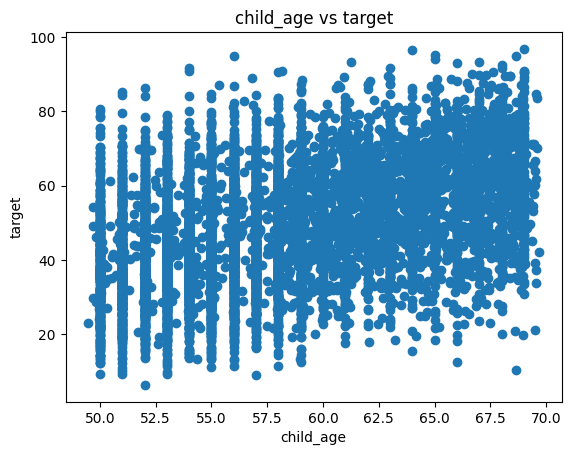

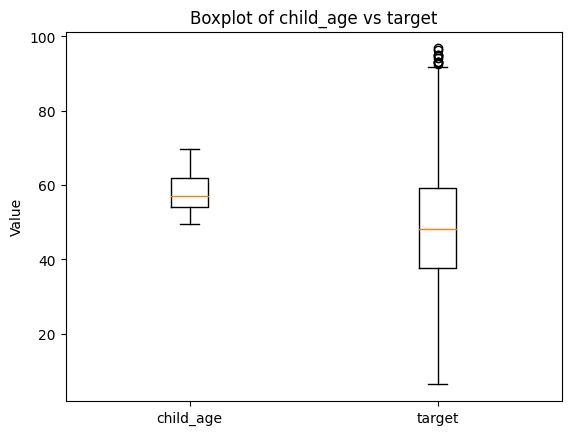

In [246]:
scatterplot(Train['child_age'],Train['target'])
boxplot(Train[['child_age','target']])

#Child age doesn't seem to be correlated to the target, maybe not alone

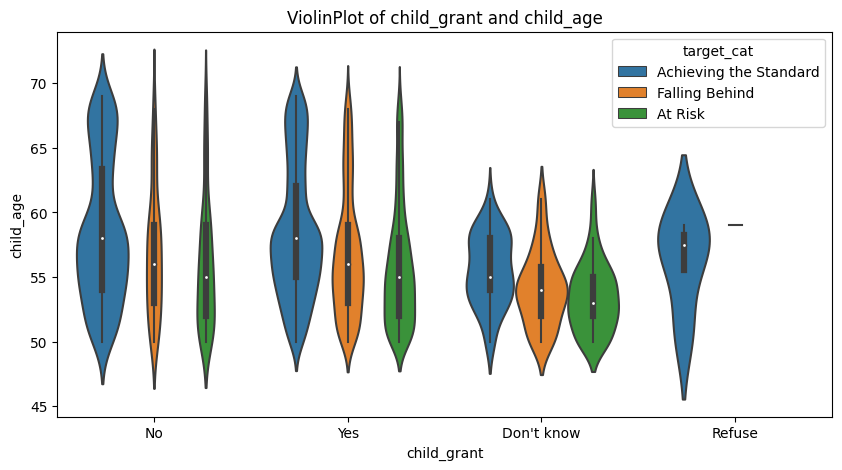

In [247]:
violinplot(x=Train['child_grant'],y=Train['child_age'],hue=Train['target_cat'],scale='count')

In [248]:
Train['age_bin'] = pd.qcut(Train['child_age'],5,labels=False)

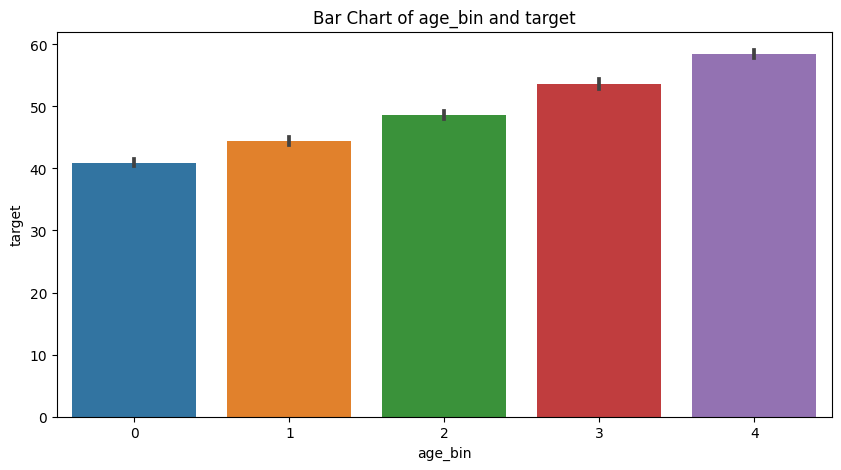

In [249]:
barchart(Train['age_bin'],Train['target'])

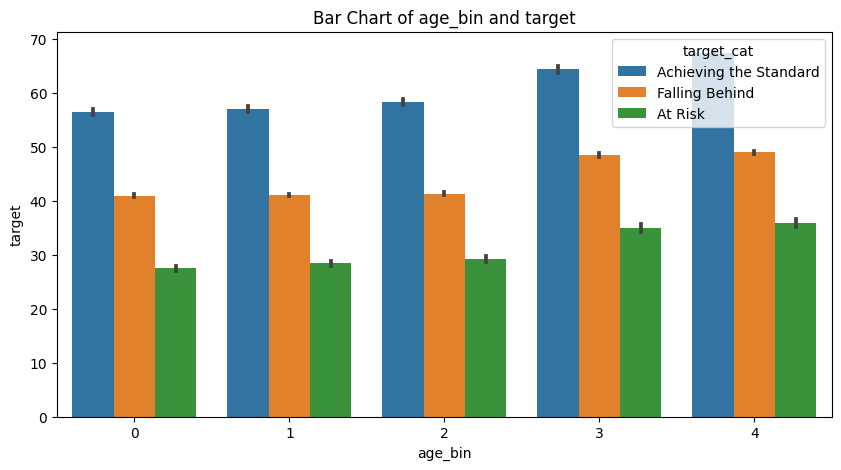

In [250]:
stack_barchart(Train['age_bin'],Train['target'],hue=Train['target_cat'])

In [251]:
Age0 = Train[Train['age_bin']==0]
Age1 = Train[Train['age_bin']==1]
Age2 = Train[Train['age_bin']==2]
Age3 = Train[Train['age_bin']==3]
Age4 = Train[Train['age_bin']==4]

print(f""" Age0 \n{Age0['target_cat'].value_counts()/len(Age0)}\n Age1 \n{Age1['target_cat'].value_counts()/len(Age1)}
      \n Age2 \n{Age2['target_cat'].value_counts()/len(Age2)}\n Age3 \n{Age3['target_cat'].value_counts()/len(Age3)}
      \n Age4 \n{Age4['target_cat'].value_counts()/len(Age4)}""")

 Age0 
At Risk                   0.384615
Achieving the Standard    0.330194
Falling Behind            0.285191
Name: target_cat, dtype: float64
 Age1 
Achieving the Standard    0.434162
Falling Behind            0.288736
At Risk                   0.277102
Name: target_cat, dtype: float64
      
 Age2 
Achieving the Standard    0.563927
Falling Behind            0.246575
At Risk                   0.189498
Name: target_cat, dtype: float64
 Age3 
Achieving the Standard    0.502662
Falling Behind            0.282890
At Risk                   0.214449
Name: target_cat, dtype: float64
      
 Age4 
Achieving the Standard    0.622960
Falling Behind            0.222611
At Risk                   0.154429
Name: target_cat, dtype: float64


In [252]:
"""These insights provide information on the distribution of target categories (i.e., "Achieving the Standard", "Falling Behind", "At Risk") among different age groups (i.e., age bins). 
It suggests that the proportion of children in each target category varies across different age groups, with the proportion of children 
categorized as "Achieving the Standard" generally increasing with age, while the proportion of children categorized as "At Risk" 
generally decreasing with age."""
pass

###child enrollment

In [155]:
Train.filter(like='enrolment')

,child_enrolment_date,child_months_enrolment
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,2020-01-15,20.0
4,2021-10-13,0.0
...,...,...
8580,2021-01-12,9.0
8581,2019-01-15,32.0
8582,2018-01-07,45.0
8583,2021-01-15,9.0


In [156]:
Train.filter(like='enrolment').isnull().sum()/len(Train)

child_enrolment_date      0.6947
child_months_enrolment    0.6947
dtype: float64

In [157]:
Train.filter(like='date')
#It seem child_enrolment_date + child_months_enrolment gives the day the child's ELOM was taken (child_date)

,child_date,child_enrolment_date,pqa_date,pra_date,pri_date,obs_date
0,2022-02-03,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-11,NaN,NaN,NaN,NaN,NaN
3,2021-10-13,2020-01-15,NaN,NaN,NaN,NaN
4,2021-10-13,2021-10-13,2021-10-29,2021-10-29,2021-10-29,2021-10-29
...,...,...,...,...,...,...
8580,2021-11-10,2021-01-12,2021-10-19,2021-10-19,2021-11-10,2021-10-19
8581,2021-10-12,2019-01-15,2021-10-12,2021-10-12,2021-10-12,2021-10-12
8582,2021-11-02,2018-01-07,2021-10-06,2021-10-06,2021-10-06,2021-10-06
8583,2021-11-05,2021-01-15,NaN,NaN,NaN,NaN


In [158]:
Train.filter(like='date').isnull().sum()/len(Train)

child_date              0.212114
child_enrolment_date    0.694700
pqa_date                0.810017
pra_date                0.809668
pri_date                0.810367
obs_date                0.809319
dtype: float64

In [159]:
vard[Train.filter(like='date').columns]
#What do the dates mean? and how are they related?

Variable Name,child_date,child_enrolment_date,pqa_date,pra_date,pri_date,obs_date
Variable Label,ELOM date,Date enrolled in ELP,Date,Date,Date,Date
Answer Label,Open ended,Open ended,Open ended,Open ended,Open ended,Open ended


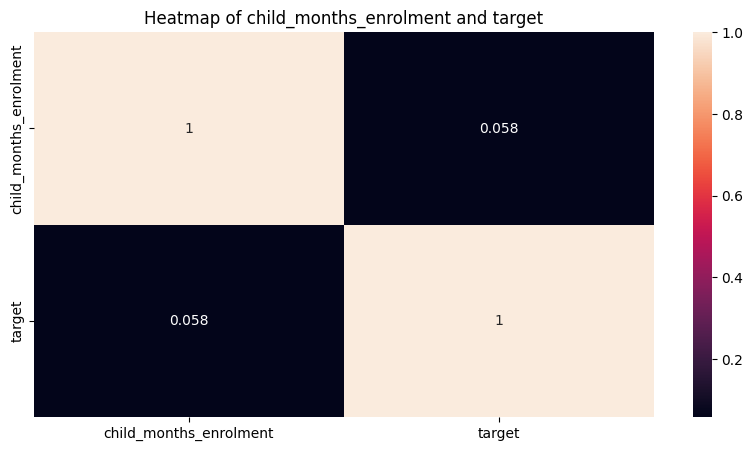

In [160]:
heatmap(Train[['child_months_enrolment','target']])

In [161]:
Train.corr()['child_months_enrolment'].sort_values(ascending=False)[:10]

child_months_enrolment       1.000000
count_practitioners_age_1    0.191992
count_register_year_2019     0.166057
count_register_year_2018     0.136209
id_enumerator                0.122746
count_register_year_2020     0.122652
pri_expense_food             0.116351
count_practitioners_age_0    0.109439
count_practitioners_age_3    0.089108
obs_classrooms               0.087340
Name: child_months_enrolment, dtype: float64

In [162]:
Train[['count_practitioners_age_1','count_register_year_2019', 'count_register_year_2018', 'id_enumerator',
      'count_register_year_2020', 'pri_expense_food','count_practitioners_age_0', 'count_practitioners_age_3','obs_classrooms']].isnull().sum()/len(Train)

count_practitioners_age_1    0.810367
count_register_year_2019     0.459755
count_register_year_2018     0.461153
id_enumerator                0.165754
count_register_year_2020     0.461619
pri_expense_food             0.811415
count_practitioners_age_0    0.810367
count_practitioners_age_3    0.810367
obs_classrooms               0.419336
dtype: float64

In [163]:
#We are missing about 69% of the Child Enrolment Dates? Should we drop the columns?
#There doesn't seem to be an accurate way of replacing the missing dates
#Dropping all columns with missing values up to the 80th percentile
#There doesn't seem to be a positive correlation with months enrolment with other features, CHECK BACK LATER

###child_years_in_programme

In [164]:
Train['child_years_in_programme'].isnull().sum()/len(Train)

0.08223645894001165

In [165]:
Train['child_years_in_programme'].value_counts()

1st year in the programme    4369
2nd year in programme        1917
3rd year in programme        1485
Do Not Know                   108
Name: child_years_in_programme, dtype: int64

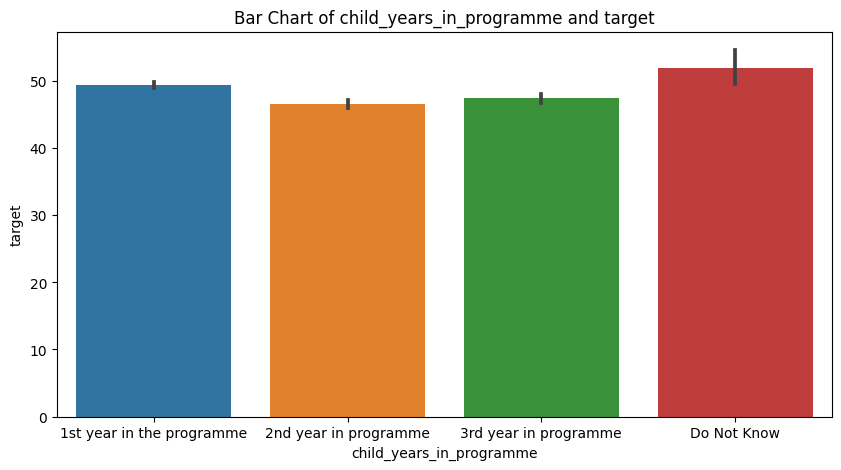

In [166]:
barchart(Train['child_years_in_programme'], Train['target'],10,5)

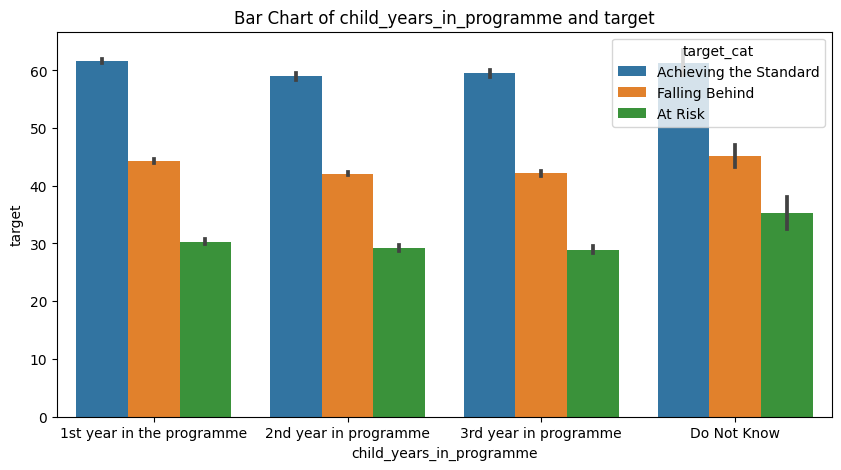

In [167]:
stack_barchart(Train['child_years_in_programme'],Train['target'],hue=Train['target_cat'],length=10,width=5)
#The third year seems to have the most uneven distribution, it has the smallest distribution of the classes of child_grant
#The second years seems to have the most even distribution

In [168]:
first = Train[Train['child_years_in_programme']=='1st year in the programme']
second = Train[Train['child_years_in_programme']=='2nd year in programme']
third = Train[Train['child_years_in_programme']=='3rd year in programme']
dnk = Train[Train['child_years_in_programme']=='Do Not Know']

print(f"""FIRST \n{first['target_cat'].value_counts()/len(first)}\nSECOND \n{second['target_cat'].value_counts()/len(second)}
      \nTHIRD \n{third['target_cat'].value_counts()/len(third)}\nDON'T KNOW \n{dnk['target_cat'].value_counts()/len(dnk)}\n""")

FIRST 
Achieving the Standard    0.490959
Falling Behind            0.261616
At Risk                   0.247425
Name: target_cat, dtype: float64
SECOND 
Achieving the Standard    0.462702
Falling Behind            0.275430
At Risk                   0.261868
Name: target_cat, dtype: float64
      
THIRD 
Achieving the Standard    0.486869
Falling Behind            0.269360
At Risk                   0.243771
Name: target_cat, dtype: float64
DON'T KNOW 
Achieving the Standard    0.555556
Falling Behind            0.231481
At Risk                   0.212963
Name: target_cat, dtype: float64



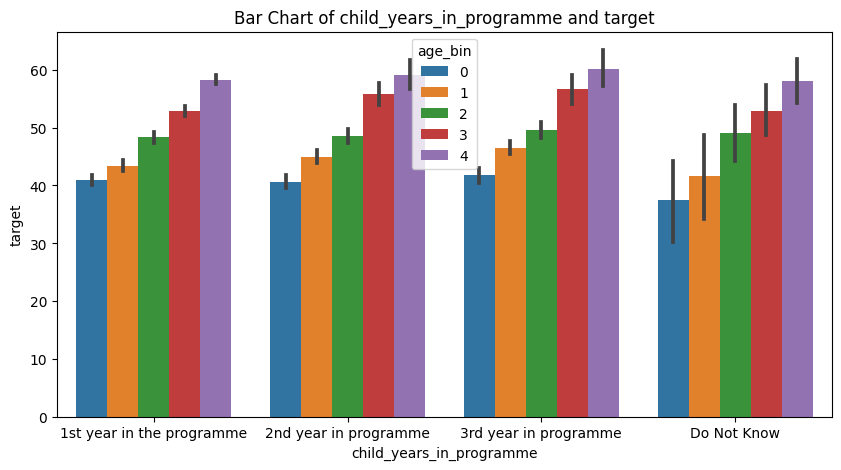

In [169]:
stack_barchart(Train['child_years_in_programme'],Train['target'],hue=Train['age_bin'],length=10,width=5)
#The children seem to be evenly distributed by age groups in the program years

In [170]:
first = Train[Train['child_years_in_programme']=='1st year in the programme']
second = Train[Train['child_years_in_programme']=='2nd year in programme']
third = Train[Train['child_years_in_programme']=='3rd year in programme']
dnk = Train[Train['child_years_in_programme']=='Do Not Know']

print(f"""FIRST \n{first['age_bin'].value_counts()/len(first)}\nSECOND \n{second['age_bin'].value_counts()/len(second)}
      \nTHIRD \n{third['age_bin'].value_counts()/len(third)}\nDON'T KNOW \n{dnk['age_bin'].value_counts()/len(dnk)}\n""")

FIRST 
4    0.245136
0    0.193179
3    0.189746
2    0.187686
1    0.184253
Name: age_bin, dtype: float64
SECOND 
1    0.302556
0    0.290037
2    0.249348
3    0.099113
4    0.058946
Name: age_bin, dtype: float64
      
THIRD 
0    0.309764
1    0.306397
2    0.251852
3    0.078788
4    0.053199
Name: age_bin, dtype: float64
DON'T KNOW 
4    0.379630
3    0.259259
2    0.203704
0    0.083333
1    0.074074
Name: age_bin, dtype: float64



In [171]:
"""Age may impact program participation: The distribution of age groups may impact the number of years children spend in the programme. 
For example, children in age bin 0 (likely younger children) have higher proportions in the first and third years of the programme, 
while children in age bin 1 (slightly older children) have a higher proportion in the second year of the programme. 
This suggests that age may impact the duration of participation in the programme, with younger children potentially spending more time 
in the programme compared to older children."""
pass

###child_height

In [172]:
Train['child_height'].isnull().sum()/len(Train)

0.18823529411764706

In [173]:
Train['child_height']

0              NaN
1       103.000000
2       108.400002
3        98.099998
4       114.000000
           ...    
8580    102.300003
8581    102.599998
8582    103.800003
8583    102.400002
8584    101.000000
Name: child_height, Length: 8585, dtype: float64

<Axes: xlabel='child_height', ylabel='target'>

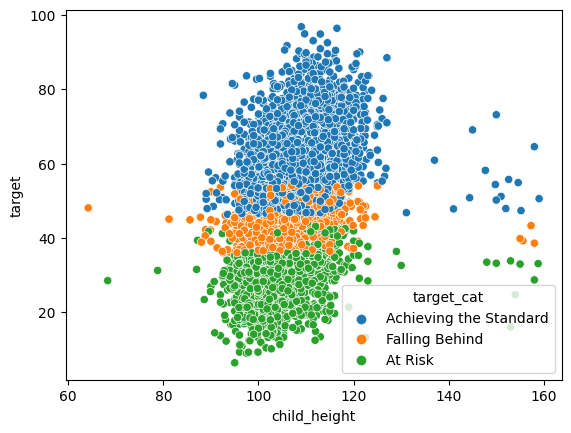

In [174]:
sns.scatterplot(x=Train['child_height'],y=Train['target'],hue=Train['target_cat'])

In [175]:
Train.corr()['child_height'].sort_values(ascending=False)[:15]

child_height              1.000000
child_zha                 0.879123
child_age                 0.404958
age_bin                   0.392548
target                    0.299639
id_facility_n             0.207178
id_prov_n                 0.199543
id_enumerator             0.197156
id_dc_n                   0.196278
id_mn_n                   0.189528
count_toilets_children    0.180029
pri_expense_staff         0.171460
pri_fees_amount_4_6       0.155698
ward_best                 0.140163
pri_expense_rent          0.137326
Name: child_height, dtype: float64

In [176]:
vard['child_zha']

Variable Label    Height for age based on WHO criteria (z-score)
Answer Label                                          Open ended
Name: child_zha, dtype: object

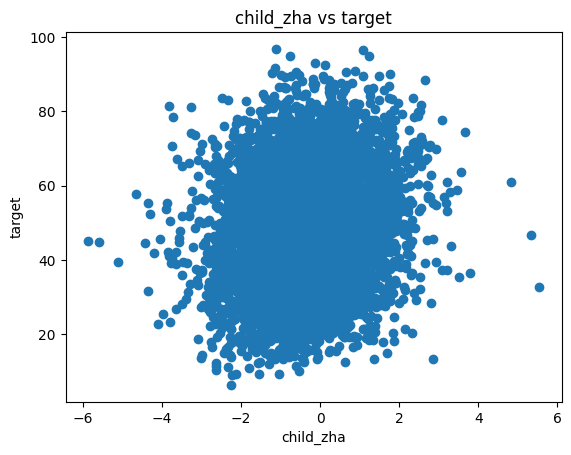

In [177]:
scatterplot(x=Train['child_zha'],y=Train['target'])

In [178]:
Train.corr()['child_zha'].sort_values(ascending=False)[:15]

child_zha                         1.000000
child_height                      0.879123
target                            0.163230
pri_fees_amount_2_3               0.145940
pri_fees_amount                   0.144825
pri_fees_amount_pv                0.143931
pri_fees_amount_0_1               0.131371
pri_expense_staff                 0.127693
pri_amount_funding_fees           0.123105
count_staff_paid                  0.120947
ses_proxy                         0.119087
count_staff_contract_permanent    0.118131
pri_expense_admin                 0.117866
pri_fees_amount_4_6               0.108303
count_staff_paid_assistants       0.100491
Name: child_zha, dtype: float64

###child_observe_attentive

In [179]:
Train['child_observe_attentive'].isnull().sum()/len(Train)

0.0

In [180]:
Train['child_observe_attentive'].value_counts()

Often            3192
Almost always    2677
Sometimes        2316
Almost never      400
Name: child_observe_attentive, dtype: int64

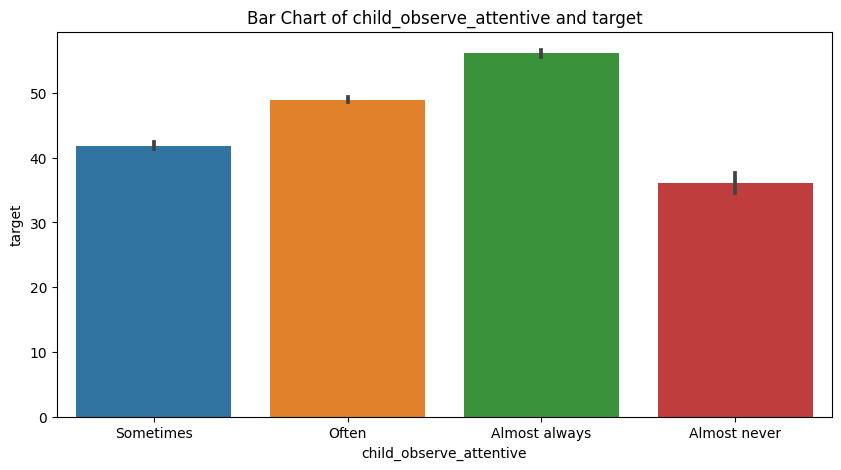

In [181]:
barchart(x=Train['child_observe_attentive'],y=Train['target'])

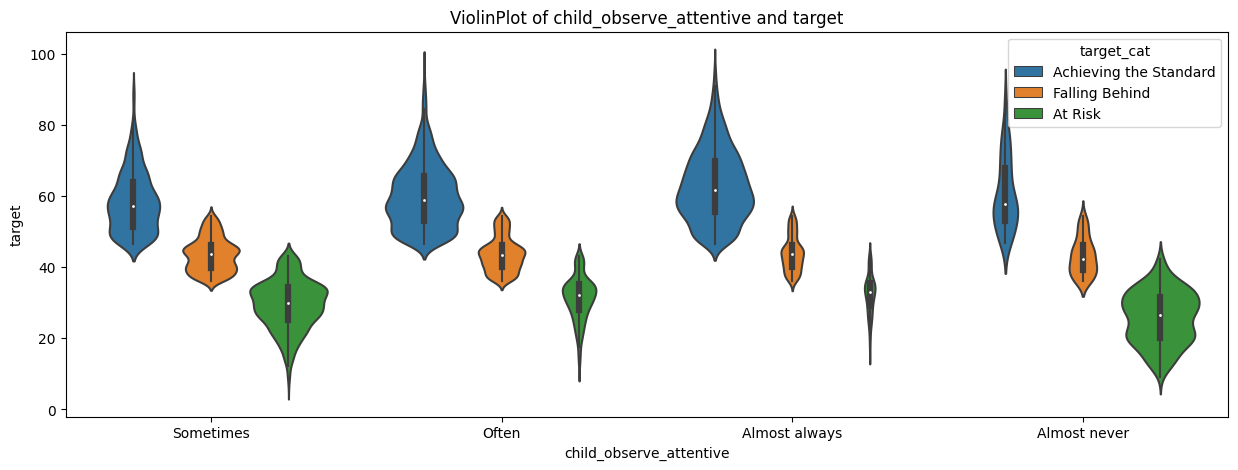

In [182]:
violinplot(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['target_cat'],scale='count',length=15)

In [183]:
att = Train[Train['child_observe_attentive']=='Sometimes']
att1 = Train[Train['child_observe_attentive']=='Often']
att2 = Train[Train['child_observe_attentive']=='Almost always']
att3 = Train[Train['child_observe_attentive']=='Almost never']

print(f"""Sometimes \n{att['target_cat'].value_counts()/len(att)}\n\n Often \n{att1['target_cat'].value_counts()/len(att1)}
      \n\n Almost always \n{att2['target_cat'].value_counts()/len(att2)}\n\n Almost never \n{att3['target_cat'].value_counts()/len(att3)}""")

Sometimes 
At Risk                   0.415803
Falling Behind            0.303109
Achieving the Standard    0.281088
Name: target_cat, dtype: float64

 Often 
Achieving the Standard    0.491228
Falling Behind            0.296053
At Risk                   0.212719
Name: target_cat, dtype: float64
      

 Almost always 
Achieving the Standard    0.700411
Falling Behind            0.203586
At Risk                   0.096003
Name: target_cat, dtype: float64

 Almost never 
At Risk                   0.5975
Falling Behind            0.2125
Achieving the Standard    0.1900
Name: target_cat, dtype: float64


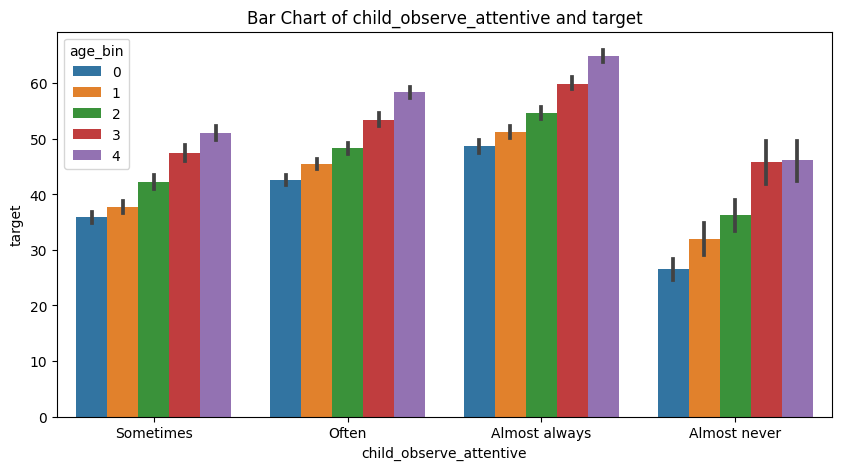

In [184]:
stack_barchart(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['age_bin'])

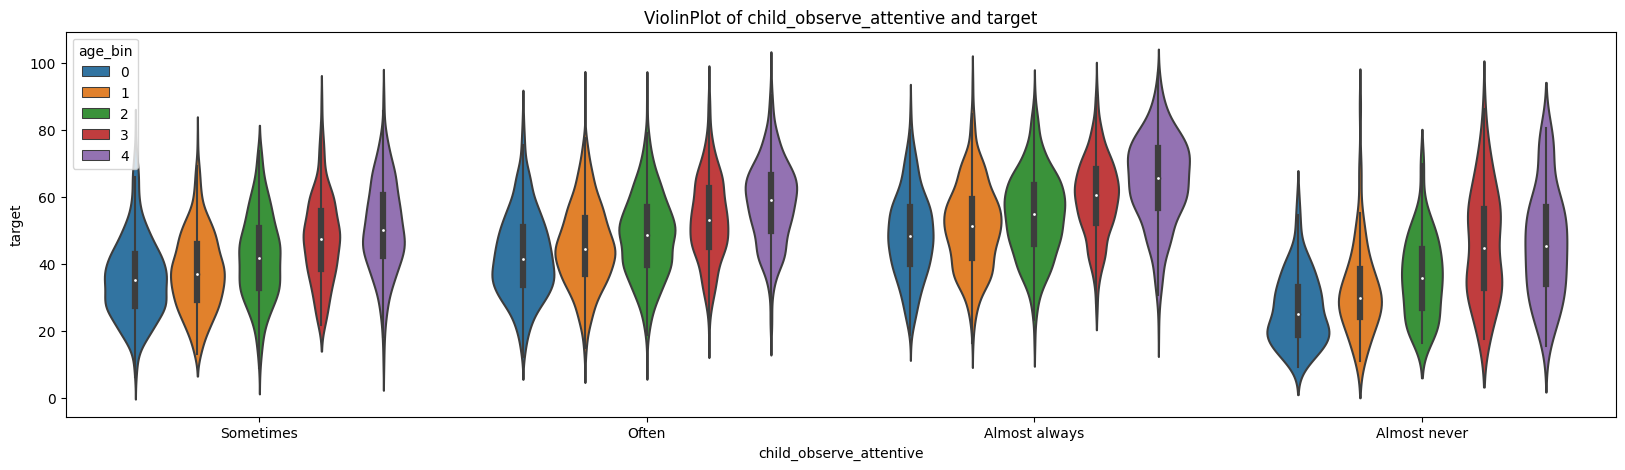

In [185]:
violinplot(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['age_bin'],scale='count',length=20)

In [186]:
att = Train[Train['child_observe_attentive']=='Sometimes']
att1 = Train[Train['child_observe_attentive']=='Often']
att2 = Train[Train['child_observe_attentive']=='Almost always']
att3 = Train[Train['child_observe_attentive']=='Almost never']

print(f"""Sometimes \n{att['age_bin'].value_counts()/len(att)}\n\n Often \n{att1['age_bin'].value_counts()/len(att1)}
      \n\n Almost always \n{att2['age_bin'].value_counts()/len(att2)}\n\n Almost never \n{att3['age_bin'].value_counts()/len(att3)}""")

Sometimes 
0    0.263385
1    0.228411
4    0.177461
2    0.175302
3    0.155440
Name: age_bin, dtype: float64

 Often 
0    0.231830
1    0.224311
2    0.209900
4    0.192356
3    0.141604
Name: age_bin, dtype: float64
      

 Almost always 
4    0.230108
2    0.225252
1    0.212551
0    0.168099
3    0.163990
Name: age_bin, dtype: float64

 Almost never 
0    0.2775
1    0.1925
4    0.1875
2    0.1825
3    0.1600
Name: age_bin, dtype: float64


In [175]:
"""These insights suggest that higher levels of attentiveness ("Often" and "Almost always") are associated with a higher proportion of 
children achieving the standard, while lower levels of attentiveness ("Sometimes" and "Almost never") are associated with a higher 
proportion of children being at risk or falling behind. This implies that attentiveness may be an important factor influencing children's 
academic performance or progress.
These insights suggest that there may be some variation in the distribution of age groups across different levels of child observance of attentiveness. 
Further analysis or statistical tests may be needed to determine if these differences are statistically significant and to understand any potential relationships 
between child attentiveness, age, and other factors.
Based on the given insights, the age group that appears to be most attentive is age group 4, as it has the highest proportion of children 
who are observed to be attentive 'Almost always'. On the other hand, the age group that appears to be least attentive is age group 3, 
as it has the lowest proportion of children who are observed to be attentive 'Sometimes', 'Often', and 'Almost always'. 
However, it's important to note that these conclusions are based on the data provided and may not necessarily indicate a 
definitive pattern or relationship. Further analysis and statistical tests may be needed to draw more conclusive insights."""
pass

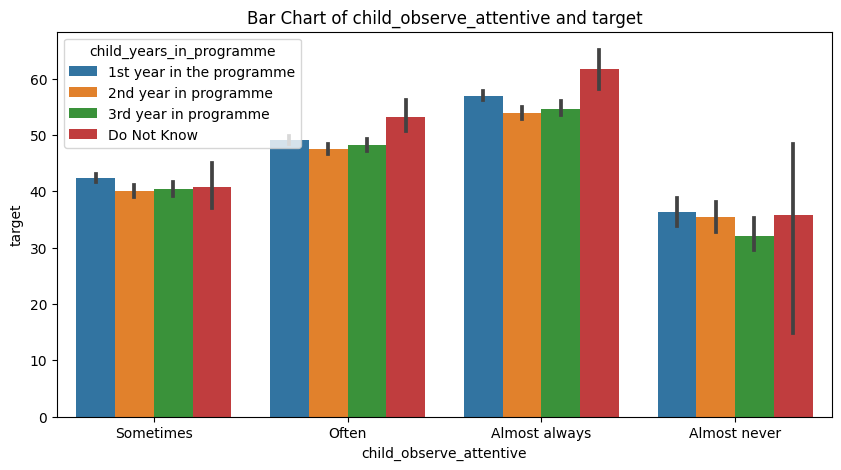

In [181]:
stack_barchart(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['child_years_in_programme'])

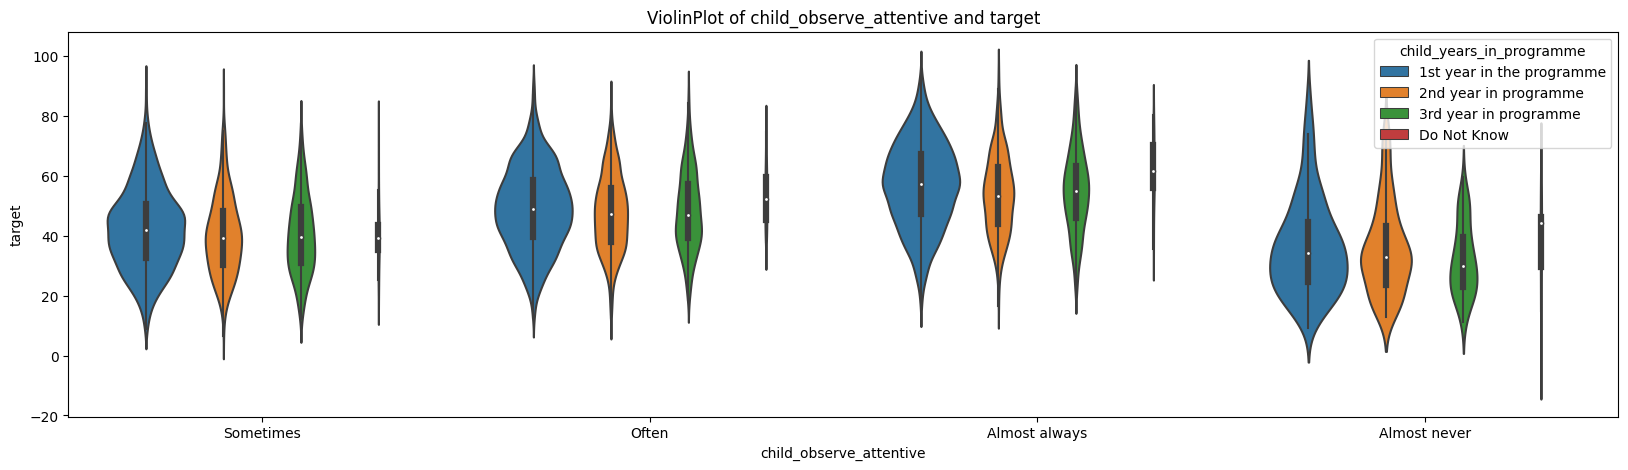

In [182]:
violinplot(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['child_years_in_programme'],scale='count',length=20)

In [183]:
att = Train[Train['child_observe_attentive']=='Sometimes']
att1 = Train[Train['child_observe_attentive']=='Often']
att2 = Train[Train['child_observe_attentive']=='Almost always']
att3 = Train[Train['child_observe_attentive']=='Almost never']

print(f"""Sometimes \n{att['child_years_in_programme'].value_counts()/len(att)}\n\n Often \n{att1['child_years_in_programme'].value_counts()/len(att1)}
      \n\n Almost always \n{att2['child_years_in_programme'].value_counts()/len(att2)}\n\n Almost never \n{att3['age_bin'].value_counts()/len(att3)}""")

Sometimes 
1st year in the programme    0.495250
2nd year in programme        0.232297
3rd year in programme        0.176166
Do Not Know                  0.012522
Name: child_years_in_programme, dtype: float64

 Often 
1st year in the programme    0.513158
2nd year in programme        0.219925
3rd year in programme        0.172932
Do Not Know                  0.013471
Name: child_years_in_programme, dtype: float64
      

 Almost always 
1st year in the programme    0.523347
2nd year in programme        0.208069
3rd year in programme        0.172208
Do Not Know                  0.012327
Name: child_years_in_programme, dtype: float64

 Almost never 
1st year in the programme    0.4575
2nd year in programme        0.3000
3rd year in programme        0.1600
Do Not Know                  0.0075
Name: child_years_in_programme, dtype: float64


In [185]:
att = Train[Train['child_observe_attentive']=='Sometimes']
att1 = Train[Train['child_observe_attentive']=='Often']
att2 = Train[Train['child_observe_attentive']=='Almost always']
att3 = Train[Train['child_observe_attentive']=='Almost never']


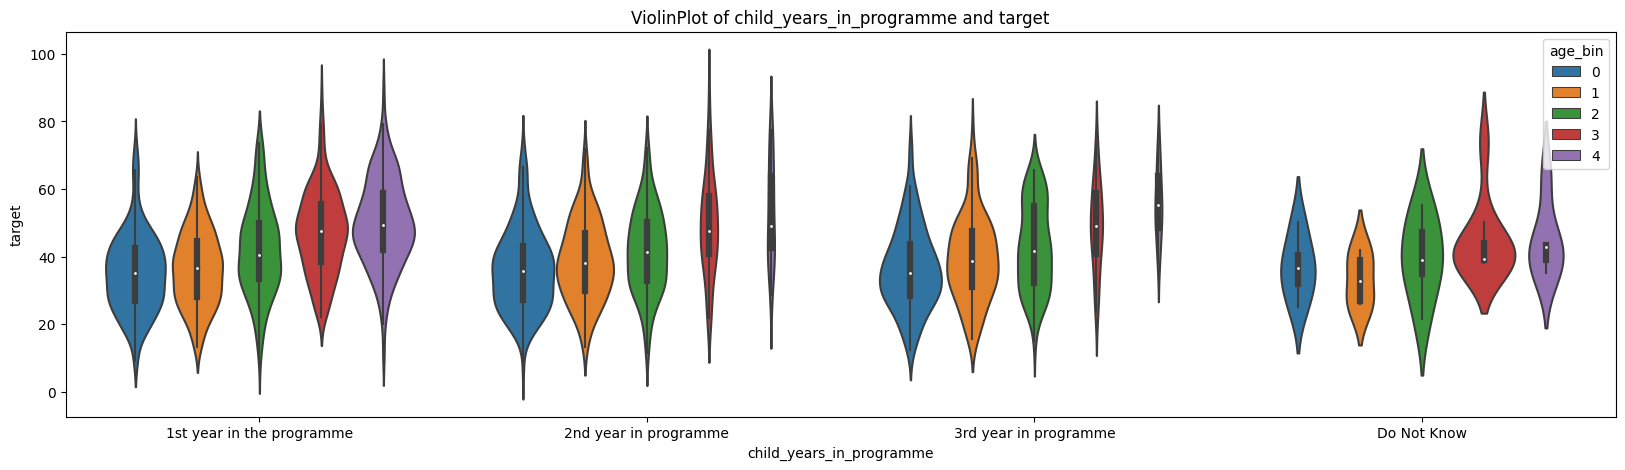

In [187]:
violinplot(x=att['child_years_in_programme'],y=att['target'],hue=att['age_bin'],scale='count',length=20)

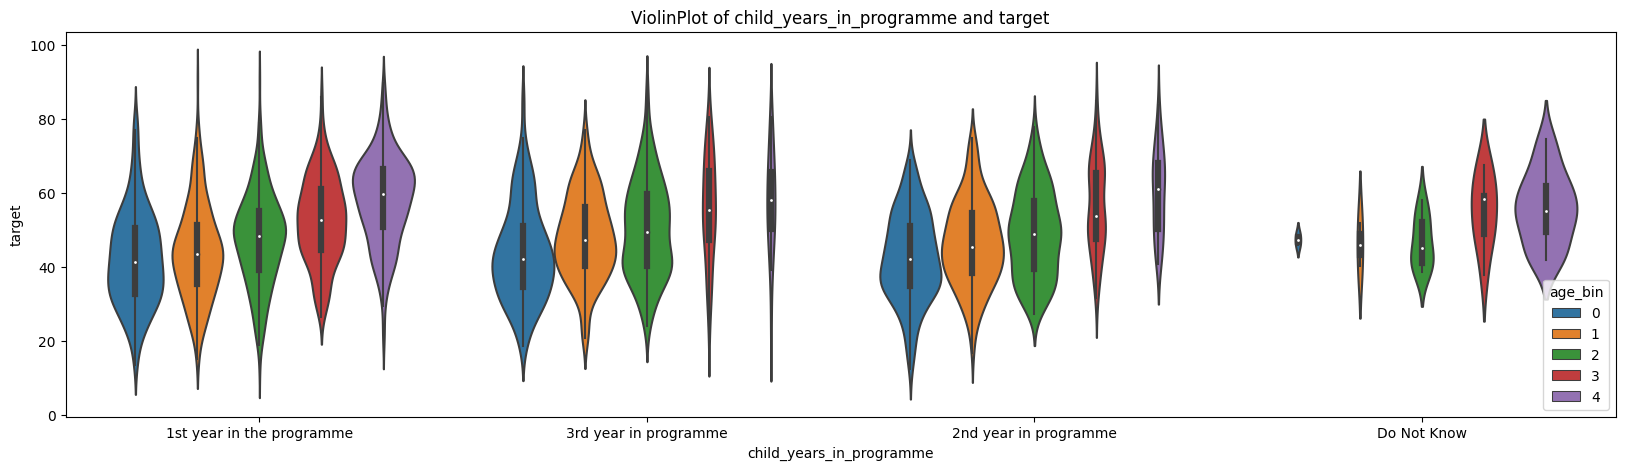

In [188]:
violinplot(x=att1['child_years_in_programme'],y=att1['target'],hue=att1['age_bin'],scale='count',length=20)

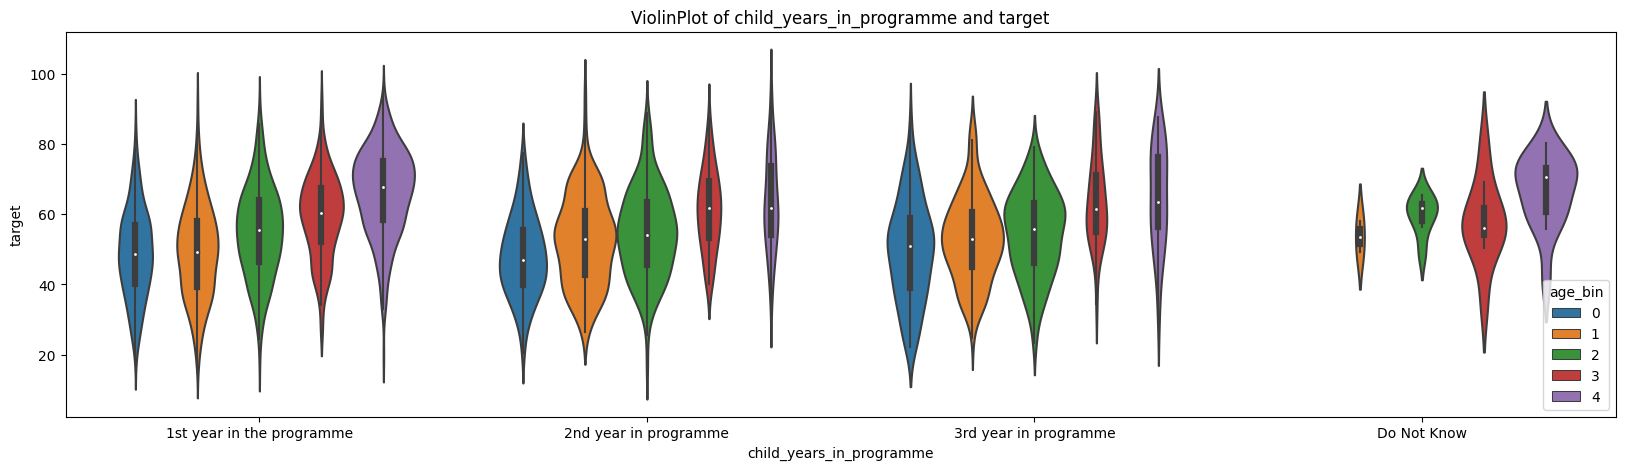

In [189]:
violinplot(x=att2['child_years_in_programme'],y=att2['target'],hue=att2['age_bin'],scale='count',length=20)

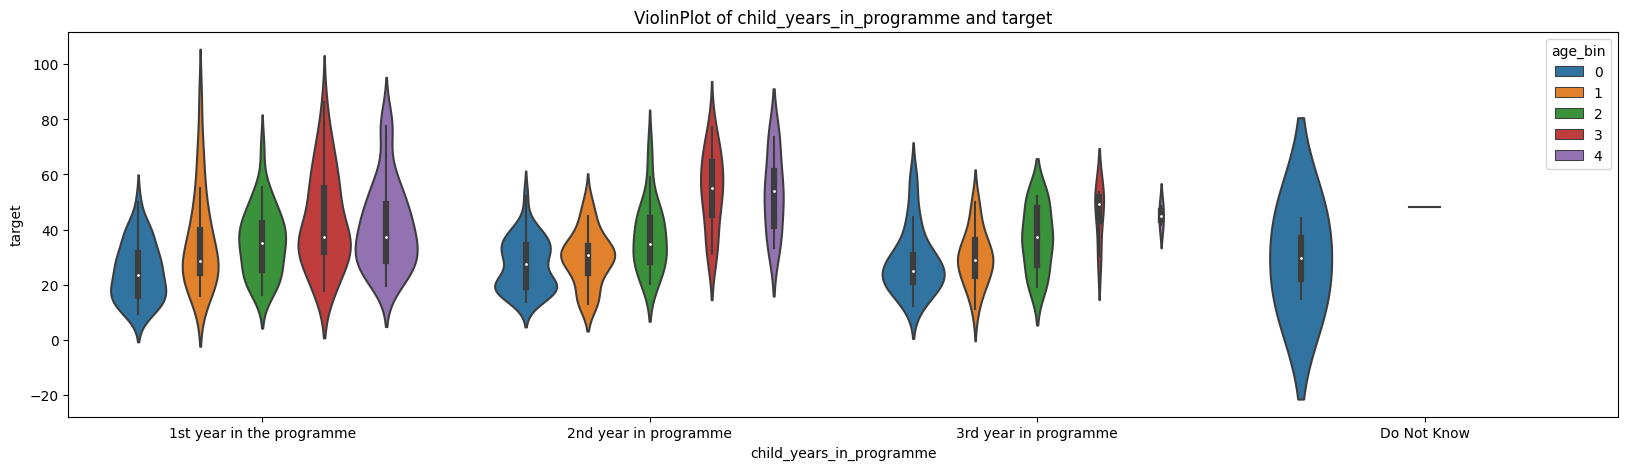

In [190]:
violinplot(x=att3['child_years_in_programme'],y=att3['target'],hue=att3['age_bin'],scale='count',length=20)

In [200]:
first = att[att['child_years_in_programme']=='1st year in the programme']
second = att[att['child_years_in_programme']=='2nd year in programme']
third = att[att['child_years_in_programme']=='3rd year in programme']
fourth = att[att['child_years_in_programme']=='Do Not Know']


print(f"""Attentive Level: Sometimes \n\n FIRST \n{first['age_bin'].value_counts()/len(first)}
      \nSECOND \n{second['age_bin'].value_counts()/len(second)}
      \nTHIRD \n{third['age_bin'].value_counts()/len(third)}\nDON'T KNOW \n{dnk['age_bin'].value_counts()/len(dnk)}\n""")

Attentive Level: Sometimes 

 FIRST 
4    0.232781
0    0.224063
3    0.195292
1    0.188317
2    0.159547
Name: age_bin, dtype: float64
SECOND 
0    0.338290
1    0.312268
2    0.215613
3    0.094796
4    0.039033
Name: age_bin, dtype: float64
      
THIRD 
0    0.372549
1    0.308824
2    0.203431
3    0.073529
4    0.041667
Name: age_bin, dtype: float64
DON'T KNOW 
4    0.379630
3    0.259259
2    0.203704
0    0.083333
1    0.074074
Name: age_bin, dtype: float64



In [201]:
first = att1[att1['child_years_in_programme']=='1st year in the programme']
second = att1[att1['child_years_in_programme']=='2nd year in programme']
third = att1[att1['child_years_in_programme']=='3rd year in programme']
fourth = att1[att1['child_years_in_programme']=='Do Not Know']


print(f"""Attentive Level: Often \n\n FIRST \n{first['age_bin'].value_counts()/len(first)}
      \nSECOND \n{second['age_bin'].value_counts()/len(second)}
      \nTHIRD \n{third['age_bin'].value_counts()/len(third)}\nDON'T KNOW \n{dnk['age_bin'].value_counts()/len(dnk)}\n""")

Attentive Level: Often 

 FIRST 
4    0.230159
0    0.205739
2    0.194139
1    0.188645
3    0.181319
Name: age_bin, dtype: float64
      
SECOND 
1    0.300570
0    0.296296
2    0.256410
3    0.086895
4    0.059829
Name: age_bin, dtype: float64
      
THIRD 
0    0.318841
1    0.317029
2    0.255435
3    0.067029
4    0.041667
Name: age_bin, dtype: float64
DON'T KNOW 
4    0.379630
3    0.259259
2    0.203704
0    0.083333
1    0.074074
Name: age_bin, dtype: float64



In [202]:
first = att2[att2['child_years_in_programme']=='1st year in the programme']
second = att2[att2['child_years_in_programme']=='2nd year in programme']
third = att2[att2['child_years_in_programme']=='3rd year in programme']
fourth = att2[att2['child_years_in_programme']=='Do Not Know']

print(f"""Attentive Level: Almost Always \n\n FIRST \n{first['age_bin'].value_counts()/len(first)}
      \nSECOND \n{second['age_bin'].value_counts()/len(second)}
      \nTHIRD \n{third['age_bin'].value_counts()/len(third)}\nDON'T KNOW \n{dnk['age_bin'].value_counts()/len(dnk)}\n""")

Attentive Level: Almost Always 

 FIRST 
4    0.272662
2    0.203426
3    0.192719
1    0.181299
0    0.149893
Name: age_bin, dtype: float64
      
SECOND 
1    0.299820
2    0.289048
0    0.228007
3    0.114901
4    0.068223
Name: age_bin, dtype: float64
      
THIRD 
1    0.299349
2    0.295011
0    0.225597
3    0.099783
4    0.080260
Name: age_bin, dtype: float64
DON'T KNOW 
4    0.379630
3    0.259259
2    0.203704
0    0.083333
1    0.074074
Name: age_bin, dtype: float64



In [203]:
first = att3[att3['child_years_in_programme']=='1st year in the programme']
second = att3[att3['child_years_in_programme']=='2nd year in programme']
third = att3[att3['child_years_in_programme']=='3rd year in programme']
fourth = att3[att3['child_years_in_programme']=='Do Not Know']


print(f"""Attentive Level: Almost Never \n\n FIRST \n{first['age_bin'].value_counts()/len(first)}
      \nSECOND \n{second['age_bin'].value_counts()/len(second)}
      \nTHIRD \n{third['age_bin'].value_counts()/len(third)}\nDON'T KNOW \n{dnk['age_bin'].value_counts()/len(dnk)}\n""")

Attentive Level: Almost Never 

 FIRST 
4    0.245902
0    0.218579
3    0.207650
2    0.185792
1    0.142077
Name: age_bin, dtype: float64
      
SECOND 
0    0.325000
1    0.283333
2    0.175000
3    0.116667
4    0.100000
Name: age_bin, dtype: float64
      
THIRD 
0    0.43750
1    0.25000
2    0.21875
3    0.06250
4    0.03125
Name: age_bin, dtype: float64
DON'T KNOW 
4    0.379630
3    0.259259
2    0.203704
0    0.083333
1    0.074074
Name: age_bin, dtype: float64



In [207]:
"""Older Kids tend to pay more attention than other age groups, but Older Kids are mostly only present in the First Year of the Programme
and the category "Don't Know". The age group 1 pays more attentions that the other groups in the Second Year and Third Year of the Programme, 
While Group 0 which are the youngest set of children most often don't pay attention, compared to others in the Third Year of the Programme."""
pass

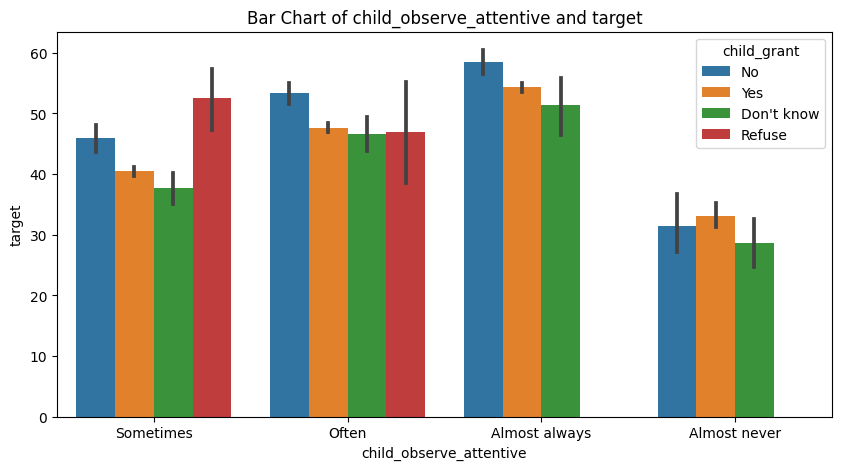

In [215]:
stack_barchart(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['child_grant'])

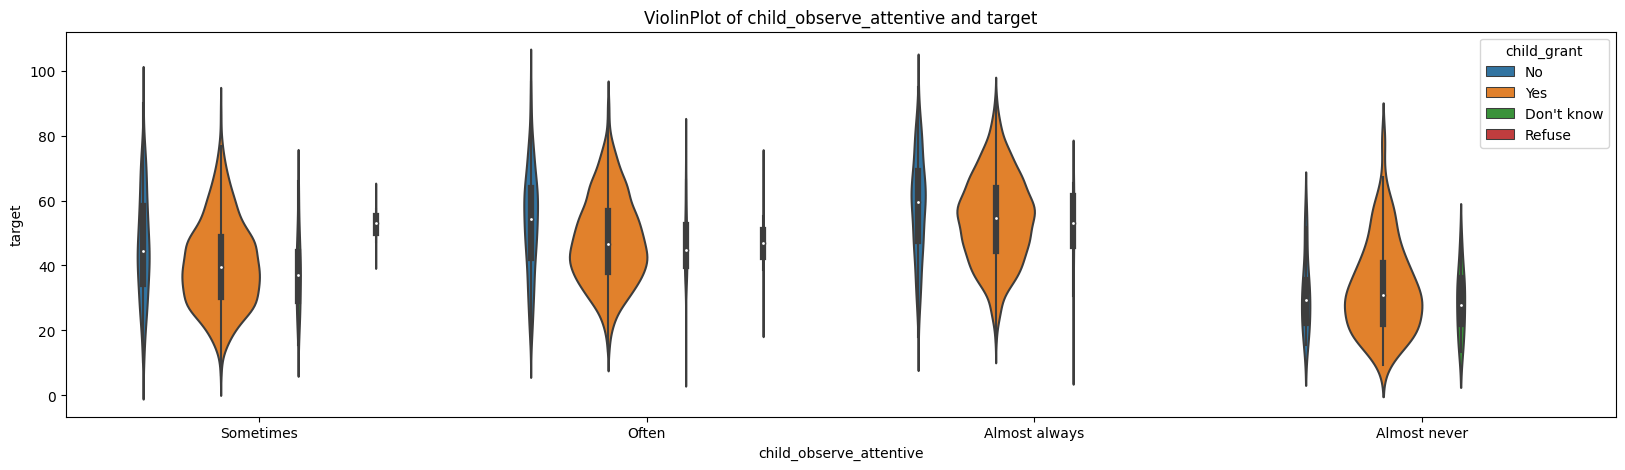

In [216]:
violinplot(x=Train['child_observe_attentive'],y=Train['target'],hue=Train['child_grant'],scale='count',length=20)

In [187]:
att = Train[Train['child_observe_attentive']=='Sometimes']
att1 = Train[Train['child_observe_attentive']=='Often']
att2 = Train[Train['child_observe_attentive']=='Almost always']
att3 = Train[Train['child_observe_attentive']=='Almost never']

print(f"""Sometimes \n{att['child_grant'].value_counts()/len(att)}\n\n Often \n{att1['child_grant'].value_counts()/len(att1)}
      \n\n Almost always \n{att2['child_grant'].value_counts()/len(att2)}\n\n Almost never \n{att3['child_grant'].value_counts()/len(att3)}""")

Sometimes 
Yes           0.545769
No            0.084197
Don't know    0.031088
Refuse        0.001295
Name: child_grant, dtype: float64

 Often 
Yes           0.525063
No            0.092732
Don't know    0.016604
Refuse        0.000627
Name: child_grant, dtype: float64
      

 Almost always 
Yes           0.512140
No            0.093762
Don't know    0.008218
Name: child_grant, dtype: float64

 Almost never 
Yes           0.5100
No            0.0550
Don't know    0.0525
Name: child_grant, dtype: float64


###child_observe_concentrated

In [253]:
Train['child_observe_concentrated'].isnull().sum()/len(Train)

0.0

In [254]:
Train['child_observe_concentrated'].value_counts()

Often            3102
Sometimes        2669
Almost always    2249
Almost never      565
Name: child_observe_concentrated, dtype: int64

In [255]:
Train.filter(like='observe').columns

Index(['child_observe_attentive', 'child_observe_concentrated',
       'child_observe_diligent', 'child_observe_interested',
       'child_observe_total'],
      dtype='object')

In [256]:
vard[Train.filter(like='observe').columns]

Variable Name,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_observe_total
Variable Label,Did the child pay attention to the instructions and demonstrations throughout...,Did the child stay concentrated and on task during the activities and was not...,Was the child careful and diligent on tasks? Was child interested in accuracy?,Was the child interested and curious about the tasks throughout the assessment?,Total score from observing the child during assessments
Answer Label,NaN,NaN,NaN,NaN,Open ended


In [257]:
def logic_mapping(att, conc, dilig, interest):
  logic_map = {'Sometimes':False,'Often':True,'Almost always':True,'Almost never':False}
  result_and = (logic_map[att]) and (logic_map[conc]) and (logic_map[dilig]) and (logic_map[interest])
  result_or = (logic_map[att]) or (logic_map[conc]) or (logic_map[dilig]) or (logic_map[interest])
  result_nand = (not(logic_map[att])) and (not(logic_map[conc])) and (not(logic_map[dilig])) and (not(logic_map[interest]))
  result_nor = (not(logic_map[att])) and (not(logic_map[conc])) and (not(logic_map[dilig])) and (not(logic_map[interest]))
  logic_remap = {True:0,False:1}
  return logic_remap[result_and], logic_remap[result_or], logic_remap[result_nand], logic_remap[result_nor]

In [258]:
Logic_ops = Train[['child_observe_attentive','child_observe_concentrated','child_observe_diligent','child_observe_interested']].apply(
    lambda row: logic_mapping(row[0],row[1],row[2],row[3]), axis=1
)

In [259]:
Train['AND_Observe'] = Logic_ops.apply(lambda row: row[0])
Train['OR_Observe'] = Logic_ops.apply(lambda row: row[1])
Train['NAND_Observe'] = Logic_ops.apply(lambda row: row[2])
Train['NOR_Observe'] = Logic_ops.apply(lambda row: row[3])

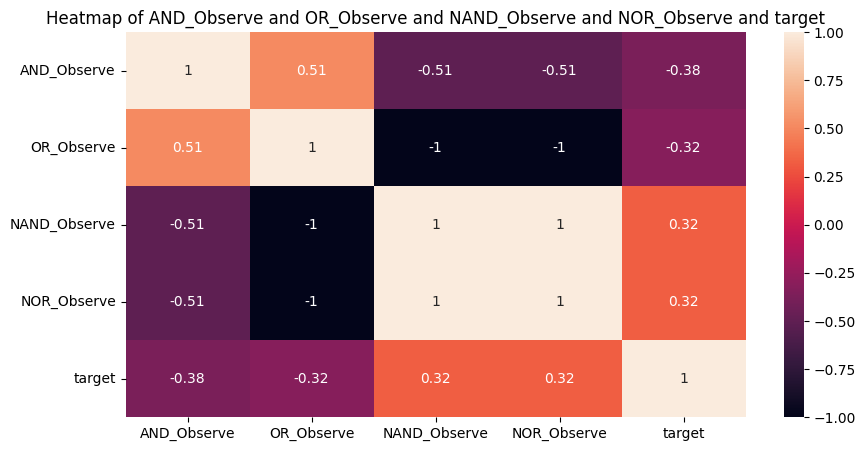

In [261]:
heatmap(Train[['AND_Observe','OR_Observe','NAND_Observe','NOR_Observe','target']])

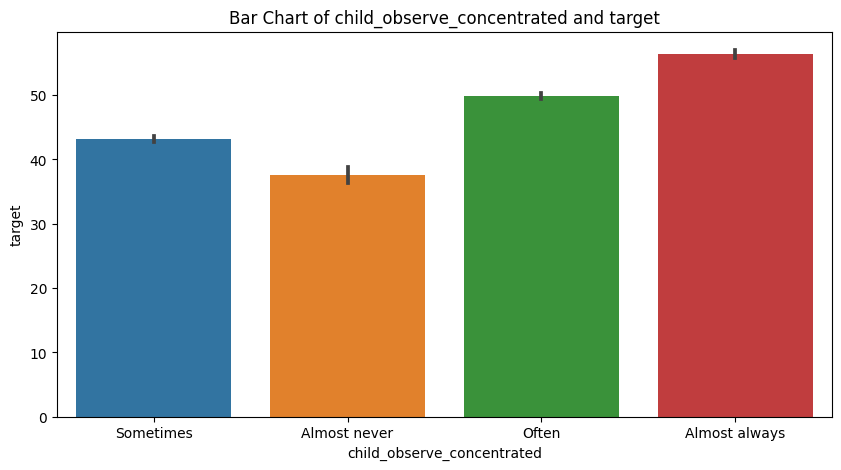

In [264]:
barchart(Train['child_observe_concentrated'],Train['target'])

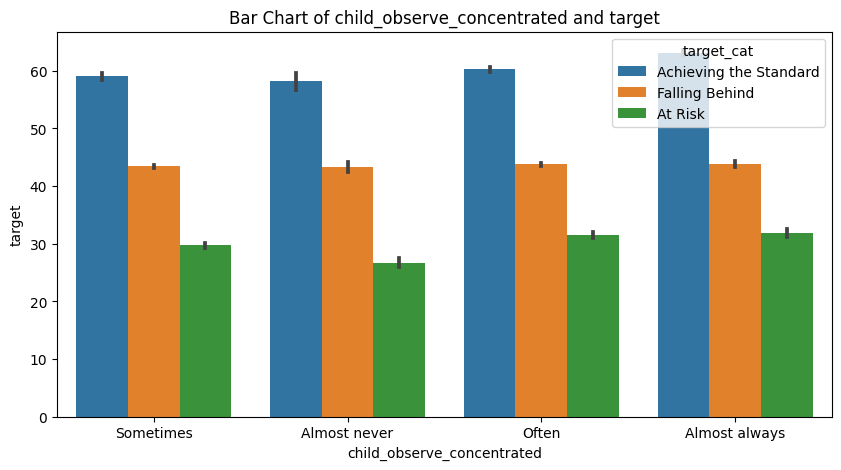

In [265]:
stack_barchart(Train['child_observe_concentrated'],Train['target'],hue=Train['target_cat'])

##Feature Engineering

In [262]:
def logic_mapping(att, conc, dilig, interest):
  logic_map = {'Sometimes':False,'Often':True,'Almost always':True,'Almost never':False}
  result_and = (logic_map[att]) and (logic_map[conc]) and (logic_map[dilig]) and (logic_map[interest])
  result_or = (logic_map[att]) or (logic_map[conc]) or (logic_map[dilig]) or (logic_map[interest])
  result_nand = (not(logic_map[att])) and (not(logic_map[conc])) and (not(logic_map[dilig])) and (not(logic_map[interest]))
  result_nor = (not(logic_map[att])) and (not(logic_map[conc])) and (not(logic_map[dilig])) and (not(logic_map[interest]))
  logic_remap = {True:0,False:1}
  return logic_remap[result_and], logic_remap[result_or], logic_remap[result_nand], logic_remap[result_nor]

In [106]:
attention_mapping = {'Sometimes': 2, 'Often': 3, 'Almost always': 4, 'Almost never': 1}
programme_year_mapping = {'1st year in the programme':1, '2nd year in programme': 2, '3rd year in programme':3, 'Do Not Know':4} 
Logic_ops = data[['child_observe_attentive','child_observe_concentrated','child_observe_diligent','child_observe_interested']].apply(
    lambda row: logic_mapping(row[0],row[1],row[2],row[3]), axis=1)
data['AND_Observe'] = Logic_ops.apply(lambda row: row[0])
data['OR_Observe'] = Logic_ops.apply(lambda row: row[1])
data['NAND_Observe'] = Logic_ops.apply(lambda row: row[2])
data['NOR_Observe'] = Logic_ops.apply(lambda row: row[3])
data['child_years_in_programme'] = data['child_years_in_programme'].map(programme_year_mapping)
data['age_bin'] = pd.qcut(data['child_age'],5,labels=False)
data['child_observe_attentive'] = data['child_observe_attentive'].map(attention_mapping)
data['child_observe_concentrated'] = data['child_observe_concentrated'].map(attention_mapping)
data['child_observe_diligent'] = data['child_observe_diligent'].map(attention_mapping)
data['child_observe_interested'] = data['child_observe_interested'].map(attention_mapping)
data['weighted_child_age+attention'] = data['child_observe_attentive'] + data['age_bin'] + 1
data['weighted_child_age*attention'] = data['child_observe_attentive'] * (data['age_bin']+1)
data['weighted_child_age+prog_year+attention'] = data['child_years_in_programme'] + data['age_bin'] + 1 + data['child_observe_attentive']
data['weighted_child_age*prog_year*attention'] = data['child_years_in_programme'] * (data['age_bin']+1) * data['child_observe_attentive']

In [107]:
data['Count_attentive_level_per_age_group'] = data.groupby(['age_bin','child_observe_attentive'])[['child_observe_attentive']].transform('count')

In [108]:
data['Mean_attentive_level_per_age_group'] = data.groupby(['age_bin','child_observe_attentive'])[['child_observe_attentive']].transform('mean')

In [109]:
data['sum_attentive_level_per_age_group'] = data.groupby(['age_bin','child_observe_attentive'])[['child_observe_attentive']].transform('sum')

In [110]:
data['Mean_weighted_attentive_level_per_age_group'] = data.groupby(['age_bin'])[['weighted_child_age+prog_year+attention']].transform('mean')

In [111]:
data['Mean_weighted_attentive*_level_per_age_group'] = data.groupby(['age_bin'])[['weighted_child_age*prog_year*attention']].transform('mean')

In [112]:
new_Train = data[data['Train']=='Train']
new_Test = data[data['Train']=='Test']

#Baseline Score

In [113]:
def Baseline_Pred(model, X, y, test, scaler=None, verbose=False, predictions=True):
  fold = KFold(n_splits=5)
  test_preds = []
  oof_f1 = []
  for train_index, test_index in fold.split(X, y):
    X_train, X_test = X.iloc[train_index],X.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=verbose)
    preds=model.predict(X_test)
    if predictions:
      test_pred = model.predict(test[X.columns])
      test_preds.append(test_pred)
    print(f"RMSE {mean_squared_error(y_test,preds,squared=False)}")
    oof_f1.append(mean_squared_error(y_test,preds,squared=False))

  print(f"Average_RMSE {sum(oof_f1)/5}")
  if predictions: 
    return test_preds, model
  return model

###Numerical Columns

In [114]:
# num_cols = list(set(Test.select_dtypes('number')).intersection(Train.select_dtypes('number')))
num_cols = new_Train.select_dtypes('number').columns
num_train = new_Train[num_cols]
#num_test = Test[num_cols]

In [115]:
missing_train_cols= plot_missing_cols(num_train, threshold=0.8, plot=False)
#missing_test_cols = plot_missing_cols(num_test, threshold=0.8, plot=False)
num_Train = num_train.drop(missing_train_cols,axis=1)
#num_Test = num_test.drop(missing_test_cols,axis=1)

In [116]:
model_cbc = CatBoostRegressor(eval_metric='RMSE')
model_lgb = LGBMRegressor()

In [117]:
num_Train.drop(['target','child_age','child_height'],axis=1,inplace=True)

In [61]:
cbc_model = Baseline_Pred(model_cbc, num_Train, Train['target'], Test, verbose=False, predictions=False)

RMSE 9.752615874150383
RMSE 9.865686223417637
RMSE 9.959507618870878
RMSE 9.911500815696918
RMSE 10.029519392739898
Average_RMSE 9.903765984975143


In [134]:
features_cbc = pd.DataFrame({'feature': list(num_Train.columns), 'importance': cbc_model.feature_importances_}).sort_values('importance', ascending = False)
features_cbc.head(30)


,feature,importance
4,child_observe_total,9.144995
7,id_enumerator,6.577408
5,child_zha,6.195335
23,teacher_emotional_total,5.401036
8,id_facility,3.287755
105,sum_attentive_level_per_age_group,3.142551
31,latitude,3.038174
32,longitude,2.948765
3,child_observe_attentive,2.623093
21,teacher_social_total,2.620279


###Categorical Columns

In [ ]:

cat_cols = Train.select_dtypes(include=['object']).columns


In [ ]:
le = LabelEncoder()

In [ ]:
test_cat_cols = Test.select_dtypes('object').columns

In [ ]:
cat_train = Train[cat_cols]
cat_test = Test[test_cat_cols]
missing_cols_train = plot_missing_cols(cat_train,threshold=0.8,plot=False)
missing_cols_test = plot_missing_cols(cat_test, threshold=0.8,plot=False)

In [ ]:
cat_Train = cat_train.drop(missing_cols_train,axis=1)
cat_Test = cat_test.drop(missing_cols_test,axis=1)

In [ ]:
for col in cat_Train.columns:
  cat_Train[col] = le.fit_transform(cat_Train[col])

In [ ]:
for col in cat_Test.columns:
  cat_Test[col] = le.fit_transform(cat_Test[col])

In [ ]:
cat_Train.drop(['child_id'],axis=1,inplace=True)
cat_Test.drop(['child_id'],axis=1,inplace=True)

In [ ]:
model_cbc = CatBoostRegressor(eval_metric='RMSE')

In [ ]:
cbc_preds, cbc_model = Baseline_Pred(model_cbc, cat_Train, Train['target'], cat_Test)

Learning rate set to 0.068909
0:	learn: 14.8490521	test: 14.9501283	best: 14.9501283 (0)	total: 14.2ms	remaining: 14.2s
200:	learn: 9.6851307	test: 10.8059703	best: 10.8059703 (200)	total: 2.2s	remaining: 8.75s
400:	learn: 8.5918430	test: 10.5717527	best: 10.5717527 (400)	total: 6.59s	remaining: 9.85s
600:	learn: 7.8813659	test: 10.4825866	best: 10.4825866 (600)	total: 8.51s	remaining: 5.65s
800:	learn: 7.3504625	test: 10.4260275	best: 10.4236185 (793)	total: 10.4s	remaining: 2.59s
999:	learn: 6.9070716	test: 10.3981200	best: 10.3970409 (953)	total: 12.4s	remaining: 0us

bestTest = 10.39704089
bestIteration = 953

Shrink model to first 954 iterations.
RMSE 10.397040890663636
Learning rate set to 0.068909
0:	learn: 14.8672276	test: 14.8676553	best: 14.8676553 (0)	total: 15.5ms	remaining: 15.5s
200:	learn: 9.6293003	test: 10.8097779	best: 10.8097779 (200)	total: 2.05s	remaining: 8.14s
400:	learn: 8.5092754	test: 10.5692738	best: 10.5692738 (400)	total: 5.35s	remaining: 8s
600:	learn: 7.7

##Submission

In [ ]:
explainer = shap.Explainer(cbc_model)

In [ ]:
# Compute the SHAP values for your test dataset
shap_values = explainer(num_Test)

In [ ]:
xd = num_Test.copy()
xd[num_Test.columns] = shap_values.values

In [ ]:
top_cols = xd.apply(lambda x: x.nlargest(15).index.tolist(), axis=1)

In [ ]:
feature_cols = Sub.filter(like='feature').columns

In [ ]:
xdc = pd.DataFrame(columns=feature_cols)
for i, cols in enumerate(top_cols):
  xdc.loc[i] = cols

In [ ]:
Sub['target'] = sum(cbc_preds)/5

In [ ]:
Sub[feature_cols] = xdc[feature_cols]

In [ ]:
Sub.to_csv('/content/Baseline_Only_Numerical_Columns_above_0.8threshold_CatBoost_Sub.csv',index=False)